In [1]:
# Compare with Fig.5 with Verhoef, W.et al. (2007). Unified optical-thermal four-stream radiative transfer theory for homogeneous vegetation canopies. IEEE Transactions on Geoscience and Remote Sensing, 45, 1808-1822.

from pypro4sail import pypro4sail
import matplotlib.pyplot as plt
import numpy as np

def plot_in_SPP(Th, Tc, Ts, Td, T_sky, sza, lai, lidf):
    Tk = 273.15;
    Th = Th + Tk;
    Tc = Tc + Tk;
    Ts = Ts + Tk;
    Td = Td + Tk;
    T_sky = T_sky + Tk;

    [emisVeg, emisSoil, T_Veg, T_Soil, LAI, hot_spot, solar_zenith, solar_azimuth, LIDF] = \
        [0.98, 0.94, Tc, Td, lai, 0.05, sza, 0, lidf]

    VZA_1 = np.arange(90,0,-0.5)
    VZA_2 = np.arange(0, 90.5, 0.5)
    n = 0;
    TB_obs = np.zeros(len(VZA_1)+len(VZA_2))

    for vza in VZA_1:
        Lw, TB_obs[n], emiss = pypro4sail.run_TIR(emisVeg, emisSoil, T_Veg, T_Soil, LAI, hot_spot, solar_zenith, solar_azimuth,
                                               vza, 0,LIDF, T_VegSunlit=Th, T_SoilSunlit=Ts, T_atm=T_sky, wav=9.5)
        n += 1

    for vza in VZA_2:
        Lw, TB_obs[n], emiss = pypro4sail.run_TIR(emisVeg, emisSoil, T_Veg, T_Soil, LAI, hot_spot, solar_zenith, solar_azimuth,
                                               vza, 180,LIDF, T_VegSunlit=Th, T_SoilSunlit=Ts, T_atm=T_sky, wav=9.5)
        n += 1
    
    # plot in the solar principal plane (SPP)
    vza = np.arange(-90,90.5,0.5)
    plt.plot(vza, TB_obs-Tk)
    plt.xlim((-90, 90))
    y_min = int(np.min(TB_obs-Tk))
    y_max = int(np.max(TB_obs-Tk))+1
    plt.ylim(y_min, y_max)
    plt.xticks(np.arange(-90,120,30))
    plt.yticks(np.arange(y_min,y_max+1,1))
    plt.xlabel('VZA')
    plt.ylabel('BT (K)')
    plt.show()

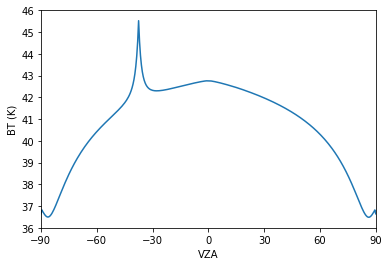

In [2]:
'''
Case 1:
Th = 37
Tc = 29
Ts = 50
Td = 26
T_sky = -14
sza = 37.5
LAI = 0.5
LIDF = ERECTOPHILE
'''
plot_in_SPP(37, 29, 50, 26, -14, 37.5, 0.5, pypro4sail.ERECTOPHILE)

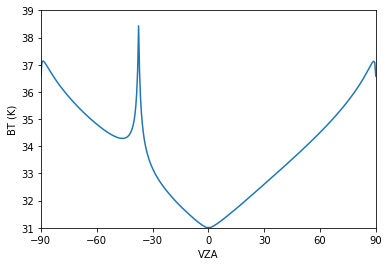

In [3]:
'''
Case 2:
Th = 37
Tc = 29
Ts = 50
Td = 26
T_sky = -14
sza = 37.5
LAI = 4
LIDF = ERECTOPHILE
'''
plot_in_SPP(37, 29, 50, 26, -14, 37.5, 4, pypro4sail.ERECTOPHILE)

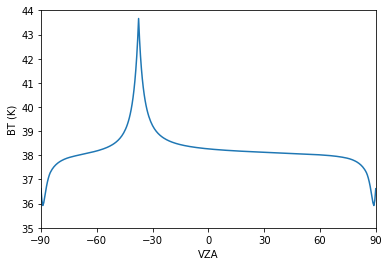

In [4]:
'''
Case 3:
Th = 37
Tc = 29
Ts = 50
Td = 26
T_sky = -14
sza = 37.5
LAI = 0.5
LIDF = PLANOPHILE
'''
plot_in_SPP(37, 29, 50, 26, -14, 37.5, 0.5, pypro4sail.PLANOPHILE)

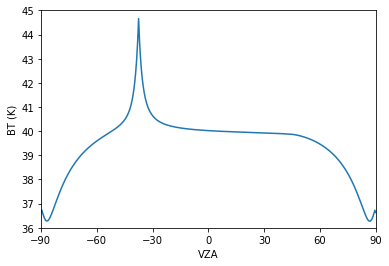

In [5]:
'''
Case 4:
Th = 37
Tc = 29
Ts = 50
Td = 26
T_sky = -14
sza = 37.5
LAI = 0.5
LIDF = PLAGIOPHILE
'''
plot_in_SPP(37, 29, 50, 26, -14, 37.5, 0.5, pypro4sail.PLAGIOPHILE)

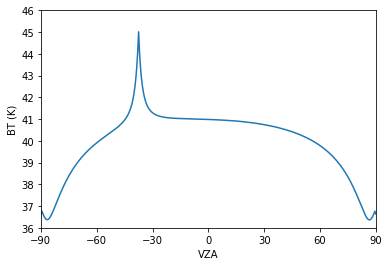

In [6]:
'''
Case 5:
Th = 37
Tc = 29
Ts = 50
Td = 26
T_sky = -14
sza = 37.5
LAI = 0.5
LIDF = SPHERICAL
'''
plot_in_SPP(37, 29, 50, 26, -14, 37.5, 0.5, pypro4sail.SPHERICAL)